# DSCI-100 Group 003-18 Project Report

Timeline:
- Monday: Lokkit
- Tuesday: Yanny
- Wednesday: Tiger
- Thursday: Alex

Remember to pull the code before working :)

## Introduction

The provided dataset from `PLAICRAFT` contains information from a research group's `Minecraft` server. This server was created to study the behaviour of players and "create an advanced artificial intelligence (AI) that not only understands speech but can also respond and act within a complex virtual environment." (Quote: [plaicraft.ai](https://plaicraft.ai/))

For this specific project, the research group is interested in recruiting more players to gather additional data. They have provided our class with some data and 3 broad questions to help them understand which players to target for recruitment. For our project, we aim to answer the following question:

> Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In more specific terms of the predictors we will be using, we answer the question:

> Can the player's own Experience, Played Hours, Gender and Age predict whether the player will subscribe to the game newsletter?

We are using the `players.csv` dataset for our analysis. Let us first load the `tidyverse` R library and load the dataset:

In [1]:
library(tidyverse)
players <- read_csv("https://raw.githubusercontent.com/Alexjhz07/DSCI-100-Project-Individual/refs/heads/main/players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Methods & Results:

We will employ Logistic Regression to model the probability of subscription (our binary dependent variable) based on key player attributes sourced from the players.csv dataset. Before conducting any analysis, we first performed minimal yet essential data cleaning steps to ensure the dataset was suitable for modelling：

1. Removed players who recorded `played_hours = 0`, since they did not engage with the game.
2. Removed rows with missing age, as age is one of our planned predictors.
3. Converted `subscribe` into a factor with levels `"no"` and `"yes"` to improve clarity and interpretability in later modelling, as these labels are easier to work with than logical TRUE/FALSE values.
4. Treated `experience` and `gender` as categorical variables.

In [2]:
players_clean <- players |>
  filter(played_hours > 0) |>
  filter(!is.na(Age)) |>
  mutate(
    subscribe = if_else(subscribe, "yes", "no"),
    subscribe = factor(subscribe, levels = c("no", "yes")),
    experience = factor(experience),
    gender = factor(gender)
  )

summary(players_clean)



    experience subscribe hashedEmail         played_hours        name          
 Amateur :35   no :25    Length:109         Min.   :  0.10   Length:109        
 Beginner:19   yes:84    Class :character   1st Qu.:  0.10   Class :character  
 Pro     :10             Mode  :character   Median :  0.50   Mode  :character  
 Regular :19                                Mean   : 10.51                     
 Veteran :26                                3rd Qu.:  1.80                     
                                            Max.   :223.10                     
               gender        Age      
 Agender          : 1   Min.   : 9.0  
 Female           :21   1st Qu.:17.0  
 Male             :75   Median :20.0  
 Non-binary       : 6   Mean   :21.3  
 Prefer not to say: 5   3rd Qu.:23.0  
 Two-Spirited     : 1   Max.   :58.0  

### Initial Summary Statistics

To gain an initial understanding of the cleaned dataset, we computed basic summary statistics for key variables. These provide a general overview of player demographics and behaviours before conducting more detailed analyses.

In [3]:
players_clean |>
  summarise(
    n_players = n(),
    mean_age = mean(Age),
    median_age = median(Age),
    mean_hours = mean(played_hours),
    median_hours = median(played_hours),
    subscription_rate = mean(subscribe == "yes")
  )

n_players,mean_age,median_age,mean_hours,median_hours,subscription_rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
109,21.30275,20,10.50917,0.5,0.7706422


### Figure 1: Distribution of Played Hours by Subscription Status (Log Scale)

To visualize differences in gameplay behaviour between subscribed and non-subscribed players, we use a jitter plot with a logarithmic y-axis. The log scale helps separate high-hour players from low-hour players, making the distribution easier to interpret for this highly right-skewed variable.

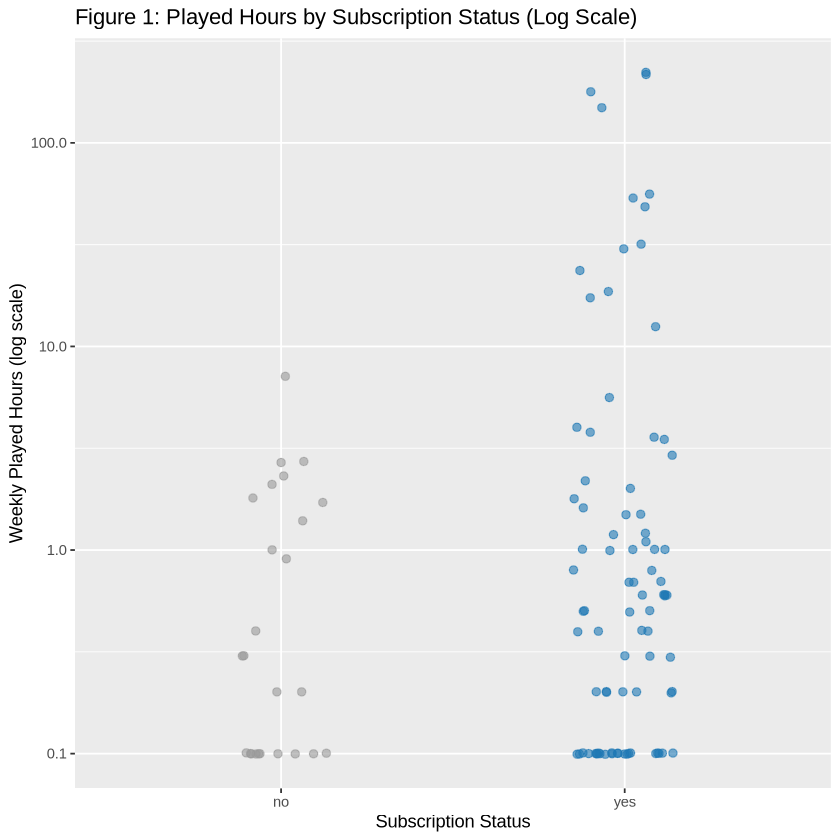

In [4]:
ggplot(players_clean, aes(x = subscribe, y = played_hours, color = subscribe)) +
  geom_jitter(alpha = 0.6, width = 0.15, size = 2) +
  scale_y_log10() +
  scale_color_manual(values = c("no" = "#999999", "yes" = "#1f78b4")) +
  labs(
    title = "Figure 1: Played Hours by Subscription Status (Log Scale)",
    x = "Subscription Status",
    y = "Weekly Played Hours (log scale)"
  ) +
  theme(legend.position = "none")

**Figure 1 Summary.**  
Players who subscribe tend to have substantially higher weekly played hours than non-subscribers. Most non-subscribed players cluster at very low playtime levels, whereas subscribed players are more widely distributed and include almost all high-hour players. This suggests that gameplay engagement is strongly associated with newsletter subscription.

### Figure 2: Subscription Rates Across Experience Levels

To further explore behavioural differences between player types, we examined how subscription rates vary across self-reported experience levels. 
This visualization highlights whether more experienced players are more likely to subscribe to the newsletter.

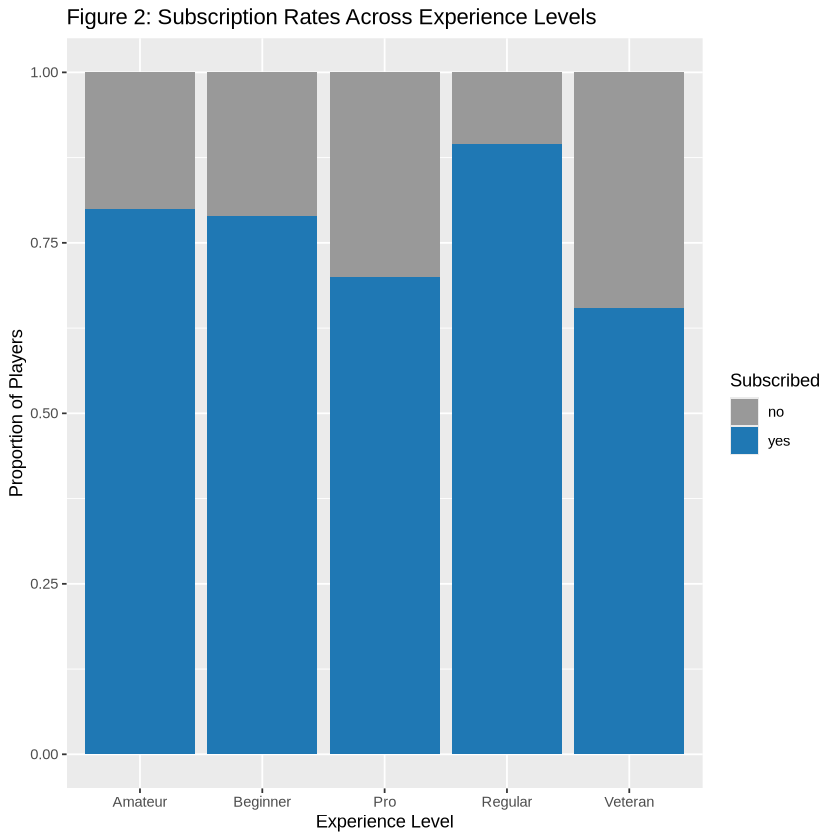

In [5]:
ggplot(players_clean, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("no" = "#999999", "yes" = "#1f78b4")) +
  labs(
    title = "Figure 2: Subscription Rates Across Experience Levels",
    x = "Experience Level",
    y = "Proportion of Players",
    fill = "Subscribed"
  )

**Figure 2 Summary.**  
Subscription behaviour differs moderately across experience levels. Regular players show the highest subscription rate, followed by Amateur and Beginner players with mid-range rates. Veteran and Pro players exhibit noticeably lower subscription rates. Although the differences are not dramatic, this pattern suggests that newsletter engagement peaks among mid-experience players rather than complete novices or the most advanced users.

### Next Steps
The remaining analyses — including logistic regression modelling, coefficient interpretation, predicted-probability visualizations, and deeper comparisons across player groups—will be completed by other members of the team in subsequent sections. I'll pass my baton to Yanny now - Lokkit.

### Comparison of Subscription Rate by Experience and Age Group

experience,age_group,n,subscription_rate
<fct>,<fct>,<int>,<dbl>
Amateur,≤15,2,1.0000000
Amateur,16–20,14,0.7857143
Amateur,21–25,14,0.9285714
Amateur,26–30,2,0.5000000
Amateur,31+,3,0.3333333
Beginner,16–20,8,0.7500000
Beginner,21–25,6,1.0000000
Beginner,26–30,3,1.0000000
Beginner,31+,2,0.0000000


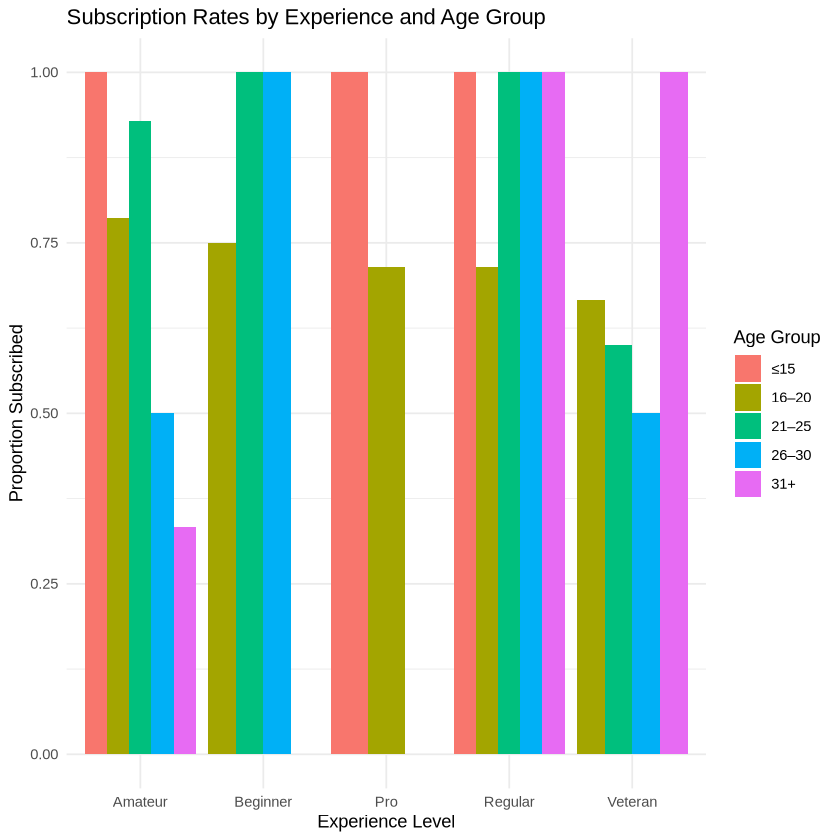

In [6]:
players_age_groups <- players_clean |>
  mutate(
    age_group = cut(
      Age,
      breaks = c(0, 15, 20, 25, 30, Inf),
      labels = c("≤15", "16–20", "21–25", "26–30", "31+"),
      right = FALSE
    )
  )

age_experience_summary <- players_age_groups |>
  group_by(experience, age_group) |>
  summarise(
    n = n(),
    subscription_rate = mean(subscribe == "yes"),
    .groups = "drop"
  )

age_experience_summary

ggplot(age_experience_summary,
       aes(x = experience, y = subscription_rate, fill = age_group)) +
  geom_col(position = "dodge") +
  labs(
    title = "Subscription Rates by Experience and Age Group",
    x = "Experience Level",
    y = "Proportion Subscribed",
    fill = "Age Group"
  ) +
  theme_minimal()

### The chart shows a comparsion of the subscription rate by experience and age Group.
+ This diagram shows that Regular and Beginner players consistently have the highest subscription rates across most age groups, suggesting that players with moderate experience are the most engaged with community content like newsletters.
+ Younger players (≤20) show strong subscription interest, especially among Pro and Beginner groups, possibly due to higher curiosity and openness.
+ Veteran and Pro players display more mixed and lower subscription rates, indicating that highly experienced players may rely less on newsletters.
+ Interestingly, older players (31+) across several experience levels also show high subscription rates, suggesting that mature users value staying connected.
+ Overall, newsletter engagement peaks among moderately experienced and younger players, rather than complete novices or long-term game veterans.

### Weekly Hours Comparison Across Experience Groups

experience,mean_hours,median_hours,max_hours
<fct>,<dbl>,<dbl>,<dbl>
Amateur,10.831429,0.50,150.0
Beginner,2.300000,0.80,23.7
Pro,3.620000,0.55,30.3
Regular,34.494737,0.60,223.1
Veteran,1.196154,0.15,12.5


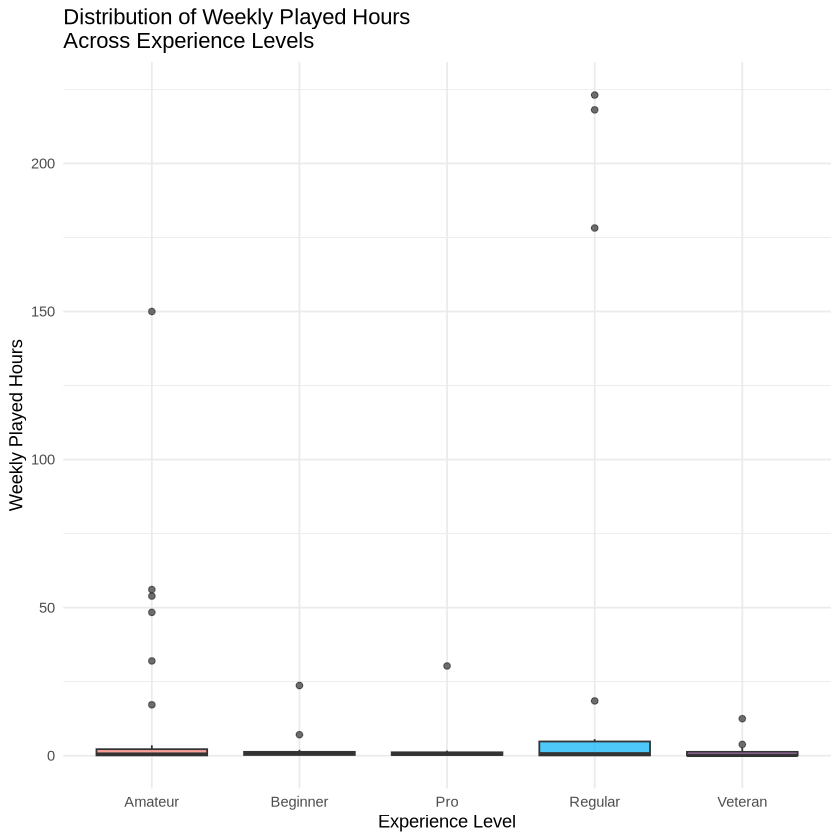

In [7]:
hours_experience_summary <- players_clean |>
  group_by(experience) |>
  summarise(
    mean_hours = mean(played_hours),
    median_hours = median(played_hours),
    max_hours = max(played_hours),
    .groups = "drop"
  )

hours_experience_summary

ggplot(players_clean,
       aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Distribution of Weekly Played Hours\nAcross Experience Levels",
    x = "Experience Level",
    y = "Weekly Played Hours"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

### The Diagram of the Weekly Hours Comparison Across Experience Groups.
+ The graph shows that Regular players spend significantly more time playing each week compared to all other experience levels, with both the highest mean (34.5 hours) and the widest range of playtime (up to 223 hours).
+ Although Amateur players also show moderate playtime (mean ~10.8 hours), their hours are much more concentrated and lower in variability.
+ Pro players do not necessarily spend more time than Beginners, indicating that higher skill does not always reflect higher engagement time.
+ Veteran players record the lowest average and median hours, suggesting that long-term familiarity with the game might reduce weekly engagement.
+ The results reveal that mid-experience (Regular) players are the most active, while Beginners and Veterans tend to have lower weekly playtime.

### Comparison of the Combined Engagement Score (Hours × Subscription)

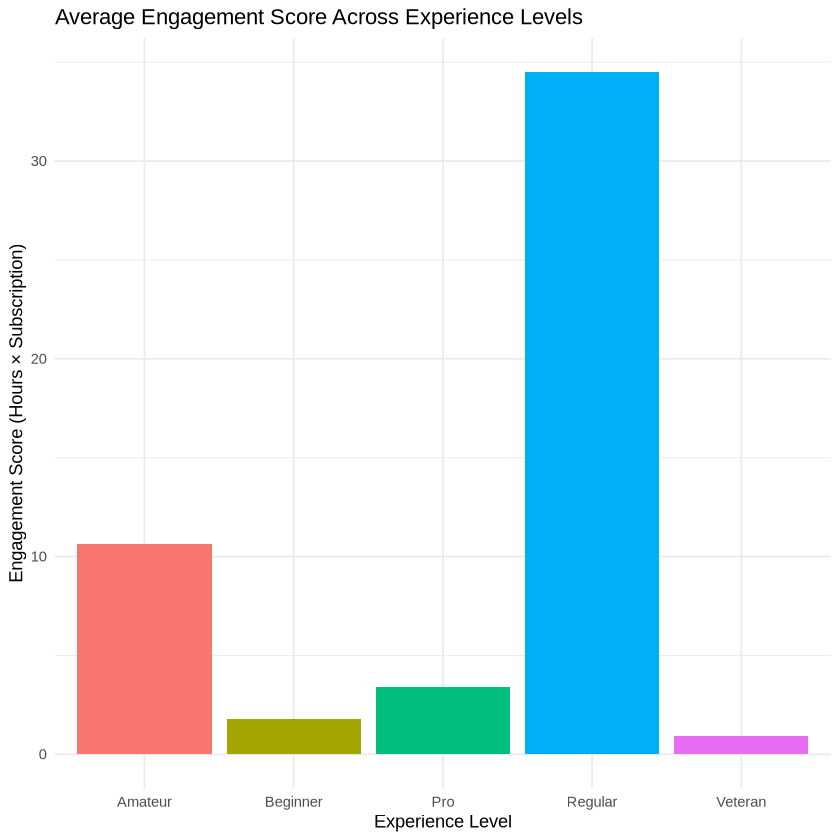

In [8]:
players_clean_engagement <- players_clean |>
  mutate(engagement_score = played_hours * if_else(subscribe == "yes", 1, 0))

engagement_summary <- players_clean_engagement |>
  group_by(experience) |>
  summarise(
    mean_engagement = mean(engagement_score),
    .groups = "drop"
  )

ggplot(engagement_summary,
       aes(x = experience, y = mean_engagement, fill = experience)) +
  geom_col() +
  labs(
    title = "Average Engagement Score Across Experience Levels",
    x = "Experience Level",
    y = "Engagement Score (Hours × Subscription)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

### Comparison of the Average Engagement Score Across Experience Levels
+ The engagement score, calculated as weekly hours played × subscription status, shows that Regular players are by far the most engaged group, with an average score over 34 — significantly higher than all other experience levels.
+ This indicates that Regular players not only subscribe at high rates but also spend the most time playing, making them the most valuable target group for community outreach and newsletter engagement. Amateur players have moderate engagement, while Beginners and Pro players show relatively low scores due to lower playtime and weaker subscription rates.
+ Veteran players record the lowest engagement, suggesting that although they are experienced, they are less active and less likely to subscribe.
+ Overall of the graph shows , mid-experience players (Regulars) demonstrate the strongest combination of time commitment and newsletter interest.

### Next Steps
The remaining analyses — including logistic regression modelling, coefficient interpretation, and the predicted-probability visualizations will be completed by other members of the team in subsequent sections. I'll pass my baton to my peers now - Tiger.

# Discussion

# References